# Machine learning; NTX
Identifying handdrawn numbers from 0 to 9. So models can identify correct digits, they need to be trained with relative data. That is done by using data from the MNIST-dataset. 

To put this in a programmers perspective, this would be considered the "Hello World" of machine learning.

There are three main sections that cover the code and explanations. There is also one additional section that covers a html-code for a local website, where the models can but up for the test of identifying a handdrawn phone number.



## Julia and some brief code explanations
### Packages

The script mainly relies on two packages: Flux and MLDatasets.

Flux:

MLDatasets:





## Models
### Feedforward neural networks
Feedforward neural networks are a type of artificial neural network where information travels in one direction, from the input layer through hidden layers to the output layer, without any feedback loops. These networks are commonly used for tasks such as pattern recognition and classification in machine learning.

##### Pros:

1. **Versatility:**
   - FNNs are versatile and can be applied to various tasks, including classification, regression, and pattern recognition.

2. **Efficiency in Pattern Recognition:**
   - FNNs excel in learning and recognizing complex patterns in data, making them suitable for tasks like image and speech recognition.

3. **Universal Approximators:**
   - FNNs have the capacity to approximate any continuous function, making them powerful tools for modeling a wide range of relationships.

##### Cons:

1. **Limited Contextual Information:**
   - FNNs lack memory of past inputs, making them less effective in tasks requiring context or sequential data analysis compared to recurrent neural networks (RNNs).

2. **Overfitting Risk:**
   - FNNs can be prone to overfitting, especially when dealing with small datasets or complex architectures. Proper regularization is crucial to address this issue.

3. **Computational Intensity:**
   - Training deep FNNs can be computationally intensive, requiring substantial computing resources, and making them less feasible for resource-constrained environments.




#### 3LS


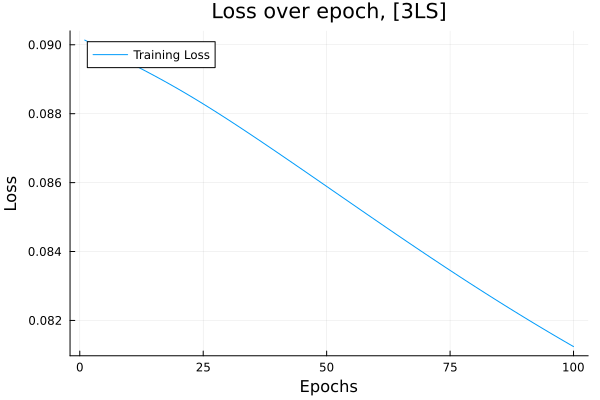


$\eta$ = 0.001, opt: ADAM

#### 3LR_SM

Stands for three layers, ReLU activations function and softmax activation for output.

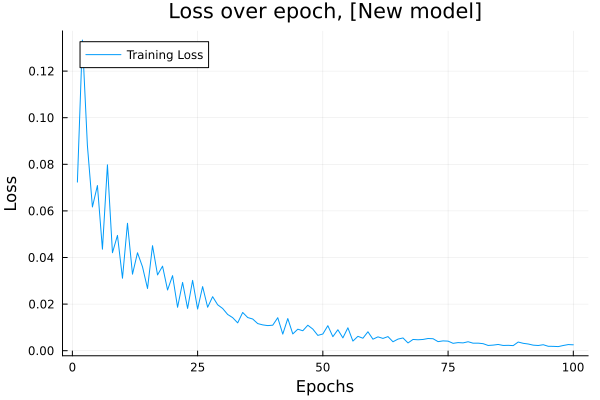

$\eta$ = 0.001, opt: ADAM

### Convolutionary neural networks

CNNs are designed for grid-structured data like images, using convolutional layers to learn hierarchical features. They excel in tasks such as image recognition and object detection, with pooling layers optimizing computation. CNNs have successfully been used for image classification, segmentation, and feature extraction. CNNs usally suit more complex machine learning problems.

### Loss functions
When it comes to the loss function there are many options such as MSE, Binary Cross-Entropy Loss and Huber loss.
#### MSE
When it comes to choosing which loss function works the best, it depends on the model. The go to loss function when working with simple models is MSE, that is Mean Squared Error. It is defined with the following formula:
$$ MSE = \frac{1}{N}\sum^n_{i=1}(y_i^2-\hat{y}_i^2) $$

### Activation functions
#### Sigmoid
The sigmoid function maps any real-valued number to a value between 0 and 1. 

The sigmoid function is less commonly used in the hidden layers of deep neural networks today. Other activation functions like the hyperbolic tangent (tanh) and rectified linear unit (ReLU) have become more popular due to their advantages, such as mitigating the vanishing gradient problem. However, the sigmoid function is still often used in the output layer for binary classification tasks.

#### Relu

The Rectified Linear Unit activation function, abbreviated as ReLU, is a piecewise linear function. It will output the input directly as it is if input is positive.
$$ ReLU(a) = max\{0,a\} $$

#### Softmax

The softmax function converts a vector of N real values into another vector of N real values, ensuring that the resulting values sum to 1. Regardless of the input values the softmax function transforms them into a range between 0 and 1.

$$ softmax(z_i) = \frac{e^{z_i}}{\sum^N_{j=1}e^{z_j}}$$

### Techniques
#### BatchNorm
Batch normalization (BatchNorm) is a technique commonly used in neural networks to improve training stability and speed. It normalizes the input of each layer in a mini-batch by adjusting and scaling it, which helps in reducing internal covariate shift. Internal covariate shift occurs when the distribution of the inputs to a neural network's layer changes during training, making it difficult for the network to learn effectively. 

### Problems
#### The vanishing gradient problem
Vanishing gradient problem is a phenomenon that occurs during the training of deep neural networks, where the gradients that are used to update the network become extremely small or "vanish" as they are backpropogated from the output layers to the earlier layers.

How do you overcome the vanishing gradient problem?
Here are some methods that are proposed to overcome the vanishing gradient problem:

- Residual Neural Networks (ResNets)
- Multi-level Hierarchy
- Long Short-Term Memory (LSTM)
- ReLU
- Batch Normalization
- Weight Initialization

[1]https://www.engati.com/glossary/vanishing-gradient-problem#:~:text=exploding%20gradient%20problem%3F-,What%20is%20vanishing%20gradient%20problem%3F,layers%20to%20the%20earlier%20layers

[2]https://en.wikipedia.org/wiki/Vanishing_gradient_problem

[3]https://builtin.com/machine-learning/relu-activation-function


### Gradient of all parameters
#### The kernel



.... equation and math before lead to
##### The Kernel as a matrix

$$K=\begin{bmatrix}\sum _k \frac{\partial f(x_1;\theta)}{\partial \theta_k}\frac{\partial f(x_1;\theta)}{\partial \theta_k} & \ldots & \sum _k \frac{\partial f(x_1;\theta)}{\partial \theta_k}\frac{\partial f(x_m;\theta)}{\partial_k} \\ \vdots & \ddots \\ \sum _k \frac{\partial f(x_n;\theta)}{\partial \theta_k}\frac{\partial f(x_1;\theta)}{\partial\theta_k} & \ldots & \sum _k \frac{\partial f(x_n;\theta)}{\theta_k} \frac{\partial f(x_m;\theta)}{\partial \theta_k} \end{bmatrix} $$






$$\text{If } A_i = \frac{\partial f(x_i;\theta)}{\partial \theta_k} \text{ , }B_j = \frac{\partial f(x_j;\theta)}{\partial \theta_k}$$

We can rewrite the Kernel-Matrix as

$$K^*=\begin{bmatrix} A_1^TB_1 & \ldots & A_1^TB_j \\ \vdots & \ddots & \\ A_i^TB_1 & \ldots & A_i^TB_j \end{bmatrix}$$

$$K^*_{i,j} = \begin{cases} A_i = B_j & i=j \\ A_i \neq B_j & i\neq j\end{cases}  $$

The Kernel-Matrix is symmetric

```
function train(nn::NN, epochs, input_params=nothing)
    """
    Function trains NN model with either custom or "random" parameters
    """

    # Load MNIST dataz
    X_train, Y_train, _, _ = load_MNIST()
    data = [(X_train, Y_train)]

    # Check if using custom parameters
    if input_params !== nothing
        # Loading parameters
        if isfile(input_params)
            loaded_dict = load(input_params)
            Flux.loadparams!(nn.model, loaded_dict["model_params"])
        end
    else
        # Initalizes with "Random parameters"
        Flux.params(nn.model)
    end

    loss_history = []
    # Actual training
    
    for epoch in 1:epochs
        loss_fn = loss_of(nn.model)
        grad = gradient(Flux.params(nn.model)) do
            total_loss = 0.0
            for (X_batch,Y_batch) in data
                total_loss += loss_fn(X_batch,Y_batch)
            end
            total_loss
        end
            
        
        #Flux.train!(loss_of(nn.model), Flux.params(nn.model), data, opt(nn))

        Flux.update!(opt(nn),Flux.params(nn.model),grad)

        push!(loss_history,get_loss(nn))
        
    end
        println("Training completed")

    return loss_history

end

```

Training completed

Elapsed time: 36.4989166 seconds

Final Loss: 0.090371616
Accuracy: 0.0958

## Optimizing neural network layers and architectures





[1]Better Deep Learning Train Faster, Reduce Overfitting, and Make Better Predictions;(
Jason Brownlee

In [ ]:
###hugmynd beint af netinu


using Flux
using Flux: onehotbatch, crossentropy, throttle, Params
using Statistics: mean
using Base.Iterators: repeated

# Assuming you have a dataset and preprocessing steps

# Define the number of layers
num_layers_list = [1, 2, 3, 4, 5]

# Define a simple neural network model
function create_model(num_layers)
    model = Chain(
        Dense(input_dim, 64, relu),
        [Dense(64, 64, relu) for _ in 1:(num_layers - 1)],
        Dense(64, output_dim, softmax)
    )
    return model
end

# Training parameters
epochs = 10
batch_size = 32
learning_rate = 0.001

# Loop through different numbers of layers
for num_layers in num_layers_list
    # Create a neural network model
    model = create_model(num_layers)
    
    # Define loss and optimizer
    loss(x, y) = crossentropy(model(x), y)
    opt = ADAM(learning_rate)
    
    # Define the data
    data = [(X_train, y_train)]
    
    # Training loop
    for epoch in 1:epochs
        Flux.train!(loss, Params(model), repeated(data, batch_size), opt)
    end
    
    # Evaluate on the validation set
    validation_accuracy = mean(Flux.onecold(model(X_validation)) .== Flux.onecold(y_validation))
    
    # Print the performance
    println("Layers=$num_layers: Validation Accuracy=$validation_accuracy")
end


Here is some `inline code`.

Here are some ```inline codes```

In [6]:


using ForwardDiff

gradient_params = ForwardDiff.gradient(params -> model_loss(params, x_data, y_data), initial_params)



plot! (generic function with 4 methods)

In [2]:
# home.jl
include("NN.jl")
include("models.jl")

using Plots
using Images
using MLDatasets
using BSON
using FileIO
using Flux
using ImageShow
using ImageInTerminal
using ImageIO
using ImageMagick
using LinearAlgebra
using JLD2

# ---------- CONSTANTS ---------- #
MODEL  = model_3LR_SM()
OPT    = "ADAM"        # OPT can be "GD" or "ADAM"... for now ;)
LR     = 0.001
EPOCHS = 100

# ----------  ---------- #
elapsed_time = @elapsed begin
    myNN = NN(MODEL, OPT, LR)
    train(myNN,EPOCHS)
    # loss_history = train(myNN, EPOCHS)
end

# Plot the loss over time
# plot(1:EPOCHS, loss_history, xlabel="Epochs", ylabel="Loss", label="Training Loss", legend=:topleft)
# title!("Loss over epoch, [New model]")
# savefig("loss_new_model.png")

# # Print results
println("Elapsed time: $elapsed_time seconds")
println("Final Loss: ", loss_history[end])
println("Accuracy: ", accuracy(myNN))
# to save model as bson file:
# @save "filename.bson" model=myNN.model

Training completed
Elapsed time: 845.0053729 seconds
Final Loss: 0.090371616


Accuracy: 0.9752


In [2]:

using Images
using MLDatasets
using BSON
using FileIO
using Flux
using ImageShow
using ImageInTerminal
using ImageIO
using ImageMagick
using LinearAlgebra
using JLD2
@save "filename.bson" model=myNN.model format=:bson

UndefVarError: UndefVarError: `myNN` not defined

In [1]:
### plot attempt

using Plots
plotly()  # You can use other backends like gr() or pyplot()

# Generate random data for demonstration (replace with your actual data)
parameters_set1 = rand(400)
parameters_set2 = rand(400)
parameters_set3 = rand(400)
loss = rand(400)

# Create a 3D scatter plot
scatter(parameters_set1, parameters_set2, loss, label="Set 1", marker=:o)
scatter!(parameters_set1, parameters_set3, loss, label="Set 2", marker=:^)
scatter!(parameters_set2, parameters_set3, loss, label="Set 3", marker=:s)

xlabel!("Parameter 1")
ylabel!("Parameter 2")
zlabel!("Loss")
title!("Parameter vs Parameter vs Loss")

# Show the plot
how


plot (generic function with 4 methods)

┌ Warning: markershape star5 is unsupported with Plots.PlotlyBackend(). Choose from: [:auto, :circle, :cross, :diamond, :dtriangle, :hexagon, :hline, :none, :octagon, :pentagon, :rect, :utriangle, :vline, :x, :xcross]
└ @ Plots C:\Users\trist\.julia\packages\Plots\sxUvK\src\args.jl:1575


In [2]:
# Install the CUDA package if not already installed


# Load the CUDA package
using CUDA

function gpu_addition()
    # Matrix size
    rows, cols = 1000, 1000

    # Create GPU arrays
    a = CUDA.fill(1.0f0, (rows, cols))
    b = CUDA.fill(2.0f0, (rows, cols))

    # Perform GPU computation (element-wise addition)
    c = @. a + b

    # Fetch the result from the GPU to the CPU
    result_cpu = Array(c)

    return result_cpu
end

# Run the GPU-accelerated function
result = gpu_addition()

# Display the result (optional)
println(result)


ErrorException: CUDA driver not found